In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [7]:
import numpy as np

In [9]:
import seaborn as sns

In [10]:
df = pd.read_csv('Amazon Sale Report.csv')

In [11]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [15]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [17]:
df.shape

(128976, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [21]:
miss_per = df.isnull().mean()*100
print(miss_per)

index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                6.047637
Amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by           69.557902
New                   100.000000
PendingS              100.000000
dtype: float64


In [23]:
print(df['fulfilled-by'].unique())

['Easy Ship' nan]


In [25]:
df['fulfilled-by'].fillna('easy ship', inplace=True)


C:\Users\dipti\AppData\Local\Temp\ipykernel_9768\2731971646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fulfilled-by'].fillna('easy ship', inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [29]:
miss_per = df.isnull().mean()*100
print(miss_per)

index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                6.047637
Amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by            0.000000
New                   100.000000
PendingS              100.000000
dtype: float64


In [31]:
# df.drop(columns=['fulfilled-by'], inplace=True)


In [33]:
df['Amount'].median()

605.0

In [35]:
df['Amount'].mode()

0    399.0
Name: Amount, dtype: float64

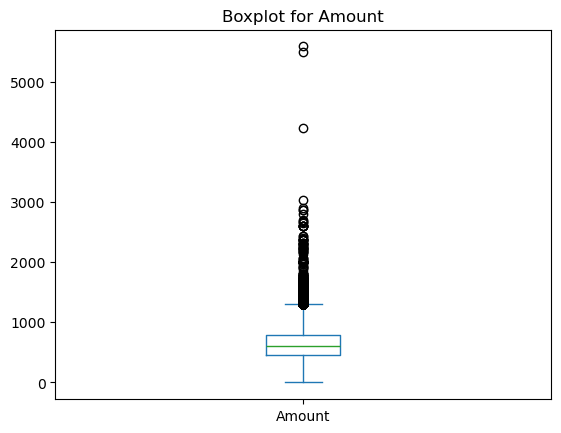

In [37]:
import matplotlib.pyplot as plt
df['Amount'].plot(kind='box', title='Boxplot for Amount')
plt.show()

In [39]:
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [41]:
df['currency'].mode()

0    INR
Name: currency, dtype: object

In [43]:
df['currency'] = df['currency'].fillna(df['currency'].mode()[0])

In [45]:
miss_per = df.isnull().mean()*100
print(miss_per)

index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                0.000000
Amount                  0.000000
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by            0.000000
New                   100.000000
PendingS              100.000000
dtype: float64


In [47]:
df.drop(columns=['PendingS'],inplace=True)

In [49]:
df.drop(columns=['New'],inplace=True)

In [51]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [53]:
miss_per = df.isnull().mean()*100

In [55]:
miss_per

index                 0.000000
Order ID              0.000000
Date                  0.000000
Status                0.000000
Fulfilment            0.000000
Sales Channel         0.000000
ship-service-level    0.000000
Category              0.000000
Size                  0.000000
Courier Status        0.000000
Qty                   0.000000
currency              0.000000
Amount                0.000000
ship-city             0.027137
ship-state            0.027137
ship-postal-code      0.027137
ship-country          0.027137
B2B                   0.000000
fulfilled-by          0.000000
dtype: float64

In [57]:
df['ship-city'].count()

128941

In [59]:
df['ship-city'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
128971    False
128972    False
128973    False
128974    False
128975    False
Name: ship-city, Length: 128976, dtype: bool

In [61]:
df['ship-city'].isnull().sum()

35

In [63]:
df['ship-city'] = df['ship-city'].fillna(df['ship-city'].mode()[0])

In [65]:
df['ship-state'] = df['ship-state'].fillna(df['ship-state'].mode()[0])

In [67]:
df['ship-country'] = df['ship-country'].fillna(df['ship-country'].mode()[0])

In [69]:
df.isnull().mean()*100

index                 0.000000
Order ID              0.000000
Date                  0.000000
Status                0.000000
Fulfilment            0.000000
Sales Channel         0.000000
ship-service-level    0.000000
Category              0.000000
Size                  0.000000
Courier Status        0.000000
Qty                   0.000000
currency              0.000000
Amount                0.000000
ship-city             0.000000
ship-state            0.000000
ship-postal-code      0.027137
ship-country          0.000000
B2B                   0.000000
fulfilled-by          0.000000
dtype: float64

In [71]:
df['ship-postal-code'].mean()

463945.6777440845

In [73]:
df['ship-postal-code'].median()

500033.0

In [75]:
# import matplotlib.pyplot as plt
# df['Amount'].plot(kind='box', title='Boxplot for Amount')
# plt.show()

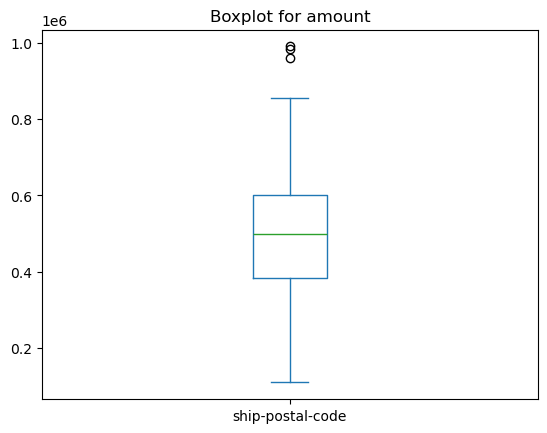

In [77]:
import matplotlib.pyplot as plt
df['ship-postal-code'].plot(kind ='box',title ='Boxplot for amount')
plt.show()

In [79]:
df['ship-postal-code']= df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0])

In [81]:
df.isnull().mean()*100

index                 0.0
Order ID              0.0
Date                  0.0
Status                0.0
Fulfilment            0.0
Sales Channel         0.0
ship-service-level    0.0
Category              0.0
Size                  0.0
Courier Status        0.0
Qty                   0.0
currency              0.0
Amount                0.0
ship-city             0.0
ship-state            0.0
ship-postal-code      0.0
ship-country          0.0
B2B                   0.0
fulfilled-by          0.0
dtype: float64

In [83]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

C:\Users\dipti\AppData\Local\Temp\ipykernel_9768\1423341283.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


In [85]:
df['Date'].dtypes

dtype('<M8[ns]')

In [87]:
df.to_csv('C:/Users/dipti/Downloads/Cleaned_Amazon_Sale.csv')